In [1]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import preprocessor as p

In [2]:
df = pd.read_csv('./Biden_No_Retweet_Full_Text_Before_Election.csv')
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets
0,2020-07-21 23:59:43,1285726179907993601,False,@JoeBiden VP Biden I wish you wouldn't debate ...,BballmomEjZay,United States,Twitter for Android,0,54,192,0
1,2020-07-21 23:59:27,1285726110513344520,False,"#GeorgeWill , it’s so sad you wake up everyday...",TalbotMac,"East Aurora, NY",Twitter for iPhone,0,882,1554,0
2,2020-07-21 23:59:24,1285726099239055361,False,Question:\nIf @JoeBiden doesn’t pick a woman o...,bk_middleclass,"Nashville, TN",Twitter for iPhone,0,1294,1213,0
3,2020-07-21 23:58:47,1285725945849151490,False,Right? 🤣🤣🤣 #Biden formally implicated in #Ukra...,MMorganBlair,United States,Twitter for iPhone,1,2476,3334,1
4,2020-07-21 23:58:02,1285725754961965056,False,These idiots let Trump do anything he wants. W...,realfacade1,Purgatory,Twitter for Android,0,2764,3799,0
...,...,...,...,...,...,...,...,...,...,...,...
15093,2020-07-13 10:57:58,1282630342038499329,False,Other than going big by eulogizing #StromThurm...,robertson_alton,"Fort Worth, or thereabouts.",Twitter Web App,0,1004,4999,0
15094,2020-07-13 10:56:26,1282629958205145091,False,Don't want to leave out the left! Show your su...,GraphicMedia4,NaN,Twitter Web App,0,1,0,0
15095,2020-07-13 10:53:50,1282629302199164928,False,Some chatter about #Biden maybe activating res...,copiousjawnt,"Lehigh Valley, PA",Twitter for Android,0,84,210,0
15096,2020-07-13 10:53:46,1282629284524433409,False,Fake #Polls? Why #Biden's 'Nationwide Lead' Ov...,blinova14,NaN,Twitter Web App,4,836,432,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15098 entries, 0 to 15097
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       15098 non-null  object
 1   Tweet_id   15098 non-null  int64 
 2   Verified   15098 non-null  bool  
 3   Tweet      15098 non-null  object
 4   User       15098 non-null  object
 5   Location   11032 non-null  object
 6   Source     15098 non-null  object
 7   Likes      15098 non-null  int64 
 8   Followers  15098 non-null  int64 
 9   Following  15098 non-null  int64 
 10  Retweets   15098 non-null  int64 
dtypes: bool(1), int64(5), object(5)
memory usage: 1.2+ MB


In [4]:
df.shape

(15098, 11)

In [5]:
df['Date'] = df['Date'].apply(lambda x: x[:-6] if '+' in x else x)
df.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets
0,2020-07-21 23:59:43,1285726179907993601,False,@JoeBiden VP Biden I wish you wouldn't debate ...,BballmomEjZay,United States,Twitter for Android,0,54,192,0
1,2020-07-21 23:59:27,1285726110513344520,False,"#GeorgeWill , it’s so sad you wake up everyday...",TalbotMac,"East Aurora, NY",Twitter for iPhone,0,882,1554,0
2,2020-07-21 23:59:24,1285726099239055361,False,Question:\nIf @JoeBiden doesn’t pick a woman o...,bk_middleclass,"Nashville, TN",Twitter for iPhone,0,1294,1213,0
3,2020-07-21 23:58:47,1285725945849151490,False,Right? 🤣🤣🤣 #Biden formally implicated in #Ukra...,MMorganBlair,United States,Twitter for iPhone,1,2476,3334,1
4,2020-07-21 23:58:02,1285725754961965056,False,These idiots let Trump do anything he wants. W...,realfacade1,Purgatory,Twitter for Android,0,2764,3799,0


In [6]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [7]:
min(df['Date'])

Timestamp('2020-07-13 10:45:12')

In [8]:
max(df['Date'])

Timestamp('2020-07-21 23:59:43')

In [9]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [10]:
df.isnull().sum()

Date            0
Tweet_id        0
Verified        0
Tweet           0
User            0
Location     4066
Source          0
Likes           0
Followers       0
Following       0
Retweets        0
dtype: int64

In [11]:
df["Source"].value_counts()

Source
Twitter Web App            5910
Twitter for iPhone         4565
Twitter for Android        3267
Twitter for iPad            705
TweetDeck                   150
                           ... 
Tweeting Neural Network       1
Moa Bridge                    1
Airtime Pro                   1
SocialPilot.co                1
Restream.io                   1
Name: count, Length: 87, dtype: int64

In [12]:
df['Location'].nunique()

3200

In [13]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

15098

In [14]:
unique_tweets_list = set(tweets_list)
len(unique_tweets_list)

15046

In [15]:
unique_tweets_list  = list(unique_tweets_list)
type(unique_tweets_list)

list

In [16]:
df['Tweet'].duplicated().sum()

52

In [17]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(15046, 11)

In [18]:
df['Tweet'].duplicated().sum()

0

In [19]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet'] = df["Tweet"].apply(remove_emoji)

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/1418489379.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = df["Tweet"].apply(remove_emoji)


In [20]:
# Deleting ReTweet rows
count = 0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [21]:
df['Processed_Tweet']

0        @JoeBiden VP Biden I wish you wouldn't debate ...
1        #GeorgeWill , it’s so sad you wake up everyday...
2        Question:\nIf @JoeBiden doesn’t pick a woman o...
3        Right? 🤣🤣🤣 #Biden formally implicated in #Ukra...
4        These idiots let Trump do anything he wants. W...
                               ...                        
15041    Other than going big by eulogizing #StromThurm...
15042    Don't want to leave out the left! Show your su...
15043    Some chatter about #Biden maybe activating res...
15044    Fake #Polls? Why #Biden's 'Nationwide Lead' Ov...
15045    #Joe #Biden #Trump police should not be armed ...
Name: Processed_Tweet, Length: 15046, dtype: object

In [22]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/1438788522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring


In [23]:
df["Processed_Tweet"]

0        @JoeBiden VP Biden I wish you wouldn't debate ...
1        #GeorgeWill , it’s so sad you wake up everyday...
2        Question:\nIf @JoeBiden doesn’t pick a woman o...
3        Right? 🤣🤣🤣 #Biden formally implicated in #Ukra...
4        These idiots let Trump do anything he wants. W...
                               ...                        
15041    Other than going big by eulogizing #StromThurm...
15042    Don't want to leave out the left! Show your su...
15043    Some chatter about #Biden maybe activating res...
15044    Fake #Polls? Why #Biden's 'Nationwide Lead' Ov...
15045    #Joe #Biden #Trump police should not be armed ...
Name: Processed_Tweet, Length: 15046, dtype: object

In [24]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/199548066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames


0          VP Biden I wish you wouldn't debate Trump un...
1        #GeorgeWill , it’s so sad you wake up everyday...
2        Question:\nIf   doesn’t pick a woman of color,...
3        Right? 🤣🤣🤣 #Biden formally implicated in #Ukra...
4        These idiots let Trump do anything he wants. W...
                               ...                        
15041    Other than going big by eulogizing #StromThurm...
15042    Don't want to leave out the left! Show your su...
15043    Some chatter about #Biden maybe activating res...
15044    Fake #Polls? Why #Biden's 'Nationwide Lead' Ov...
15045    #Joe #Biden #Trump police should not be armed ...
Name: Processed_Tweet, Length: 15046, dtype: object

In [25]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/2004849690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls


0          VP Biden I wish you wouldn't debate Trump un...
1        #GeorgeWill , it’s so sad you wake up everyday...
2        Question:\nIf   doesn’t pick a woman of color,...
3        Right? 🤣🤣🤣 #Biden formally implicated in #Ukra...
4        These idiots let Trump do anything he wants. W...
                               ...                        
15041    Other than going big by eulogizing #StromThurm...
15042    Don't want to leave out the left! Show your su...
15043    Some chatter about #Biden maybe activating res...
15044    Fake #Polls? Why #Biden's 'Nationwide Lead' Ov...
15045    #Joe #Biden #Trump police should not be armed ...
Name: Processed_Tweet, Length: 15046, dtype: object

In [26]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/806794390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag


0          VP Biden I wish you wouldn't debate Trump un...
1        GeorgeWill , it’s so sad you wake up everyday ...
2        Question:\nIf   doesn’t pick a woman of color,...
3        Right? 🤣🤣🤣 Biden formally implicated in Ukrain...
4        These idiots let Trump do anything he wants. W...
                               ...                        
15041    Other than going big by eulogizing StromThurmo...
15042    Don't want to leave out the left! Show your su...
15043    Some chatter about Biden maybe activating reso...
15044    Fake Polls? Why Biden's 'Nationwide Lead' Over...
15045    Joe Biden Trump police should not be armed to ...
Name: Processed_Tweet, Length: 15046, dtype: object

In [27]:
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/3368534414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]


0        VP Biden I wish you wouldn't debate Trump unle...
1        GeorgeWill , its so sad you wake up everyday f...
2        Question:If doesnt pick a woman of color, woul...
3        Right? Biden formally implicated in Ukraine sc...
4        These idiots let Trump do anything he wants. W...
                               ...                        
15041    Other than going big by eulogizing StromThurmo...
15042    Don't want to leave out the left! Show your su...
15043    Some chatter about Biden maybe activating reso...
15044    Fake Polls? Why Biden's 'Nationwide Lead' Over...
15045    Joe Biden Trump police should not be armed to ...
Name: Processed_Tweet, Length: 15046, dtype: object

In [28]:
#removing unnecessary special characters, numbers, punctuations in tweets
df["Processed_Tweet"] = df["Processed_Tweet"].str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/4249230652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Processed_Tweet"] = df["Processed_Tweet"].str.replace("[^a-zA-Z]", " ")


0        VP Biden I wish you wouldn't debate Trump unle...
1        GeorgeWill , its so sad you wake up everyday f...
2        Question:If doesnt pick a woman of color, woul...
3        Right? Biden formally implicated in Ukraine sc...
4        These idiots let Trump do anything he wants. W...
                               ...                        
15041    Other than going big by eulogizing StromThurmo...
15042    Don't want to leave out the left! Show your su...
15043    Some chatter about Biden maybe activating reso...
15044    Fake Polls? Why Biden's 'Nationwide Lead' Over...
15045    Joe Biden Trump police should not be armed to ...
Name: Processed_Tweet, Length: 15046, dtype: object

In [29]:
df["Processed_Tweet"] = [low.lower() for low in df["Processed_Tweet"]] #Converting into lower case 
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/98036649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Processed_Tweet"] = [low.lower() for low in df["Processed_Tweet"]] #Converting into lower case


0        vp biden i wish you wouldn't debate trump unle...
1        georgewill , its so sad you wake up everyday f...
2        question:if doesnt pick a woman of color, woul...
3        right? biden formally implicated in ukraine sc...
4        these idiots let trump do anything he wants. w...
                               ...                        
15041    other than going big by eulogizing stromthurmo...
15042    don't want to leave out the left! show your su...
15043    some chatter about biden maybe activating reso...
15044    fake polls? why biden's 'nationwide lead' over...
15045    joe biden trump police should not be armed to ...
Name: Processed_Tweet, Length: 15046, dtype: object

In [30]:
df["Processed_Tweet"] =  df["Processed_Tweet"].str.replace("amp", "")
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/3668848714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Processed_Tweet"] =  df["Processed_Tweet"].str.replace("amp", "")


0        vp biden i wish you wouldn't debate trump unle...
1        georgewill , its so sad you wake up everyday f...
2        question:if doesnt pick a woman of color, woul...
3        right? biden formally implicated in ukraine sc...
4        these idiots let trump do anything he wants. w...
                               ...                        
15041    other than going big by eulogizing stromthurmo...
15042    don't want to leave out the left! show your su...
15043    some chatter about biden maybe activating reso...
15044    fake polls? why biden's 'nationwide lead' over...
15045    joe biden trump police should not be armed to ...
Name: Processed_Tweet, Length: 15046, dtype: object

In [31]:
df['Processed_Tweet'][11] 

"hey guys, it's time to realize we've been duped...granted biden is a horrible idea, just maybe if he wins patriots will get off their asses and take america back!!!"

Exploratory data analysis

In [32]:
df['User'].value_counts()

User
Hotpage_News      544
jacketrose86      174
mobygrapefan       71
defeatthedevil     67
deepen915          61
                 ... 
IiiDenzel           1
OzRant              1
SuePBC65            1
AlenLLC             1
GraphicMedia4       1
Name: count, Length: 8270, dtype: int64

In [33]:
df.query('User == "Hotpage_News"')["Processed_Tweet"].tolist()

['lincoln project trolls trump by adding laugh track to disastrous chris wallace interview - biden trump gop republican democrat democrats liberal conservative independent covid19 covid coronavirus',
 'we sent our kids to summer c. it shutdown with a covid-19 outbreak after just a few days. this is what school will look like. - covid19 covid coronavirus trump biden pandemic virus mask schoolreopening',
 'trump blasts china in public, but privately trump org imports tons of chinese goods - biden trump gop republican democrat democrats liberal conservative independent covid19 covid coronavirus',
 "giants' gabe kapler becomes first mlb manager to kneel during national anthem - biden trump gop republican democrat democrats liberal conservative independent covid19 covid coronavirus",
 'trump says the game is over for him if athletes kneel during national anthem - biden trump gop republican democrat democrats liberal conservative independent covid19 covid coronavirus',
 'walmart, mcdonalds, 

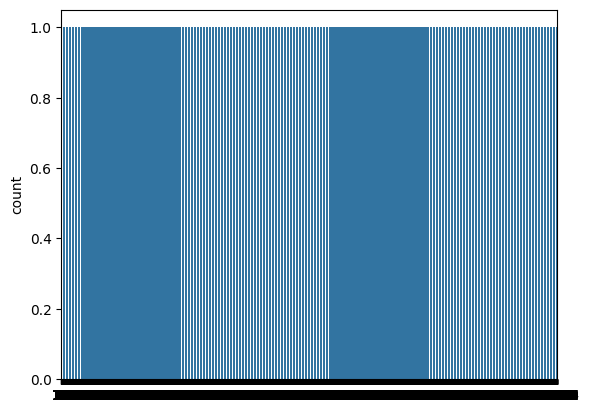

In [34]:
bar = sns.countplot(df['Verified'])

In [35]:
df['Verified'].value_counts()

Verified
False    14830
True       216
Name: count, dtype: int64

In [36]:
df_verified = df.query('Verified == True')

In [37]:
df_verified['User'].value_counts()

User
AndyOstroy         15
JudicialWatch       9
The_NewArab         7
DemsAbroad          7
Varneyco            7
                   ..
Lee4USCongress      1
UnivisionNews       1
DrJasonJohnson      1
GordonRepinski      1
plagiarismtoday     1
Name: count, Length: 121, dtype: int64

In [38]:
df_verified.query('User == "AndyOstroy"')["Processed_Tweet"].tolist()

['its intellectually dishonest, and quite hypocritical, for liberals who preach unity and bipartisanship to be losing their damn minds because one republican is gonna speak at the democratic convention... johnkasich kasich biden',
 'we are now at a new cray-cray low in the trump presidency where he\'s challenged biden to a duel to see who can \'ace\' the "is this a lion or a monkey?" cognitive test... chriswallace',
 'humiliating...historic... landslide. its coming.... trump election2020 biden',
 'hey like how you cried daddy, daddy, please dont let them make me go to vietnam! before he bought you those deferments? coward... trump chriswallace biden',
 "how do you feel about susanrice as biden's vp?",
 'i believe on nov rd were going to witness the biggest, most humiliating, most historic backlash against and republicans this country has ever seen and could ever have imagined... election2020 biden trump',
 "hey moron...all of this darkness, despair, dysfunction, disease, death you're s

In [39]:
days = df['Date'].dt.day.tolist()

In [40]:
no_of_days = Counter(days)
no_of_days

Counter({21: 2084,
         15: 2020,
         14: 1884,
         20: 1862,
         19: 1712,
         16: 1638,
         17: 1573,
         18: 1322,
         13: 951})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

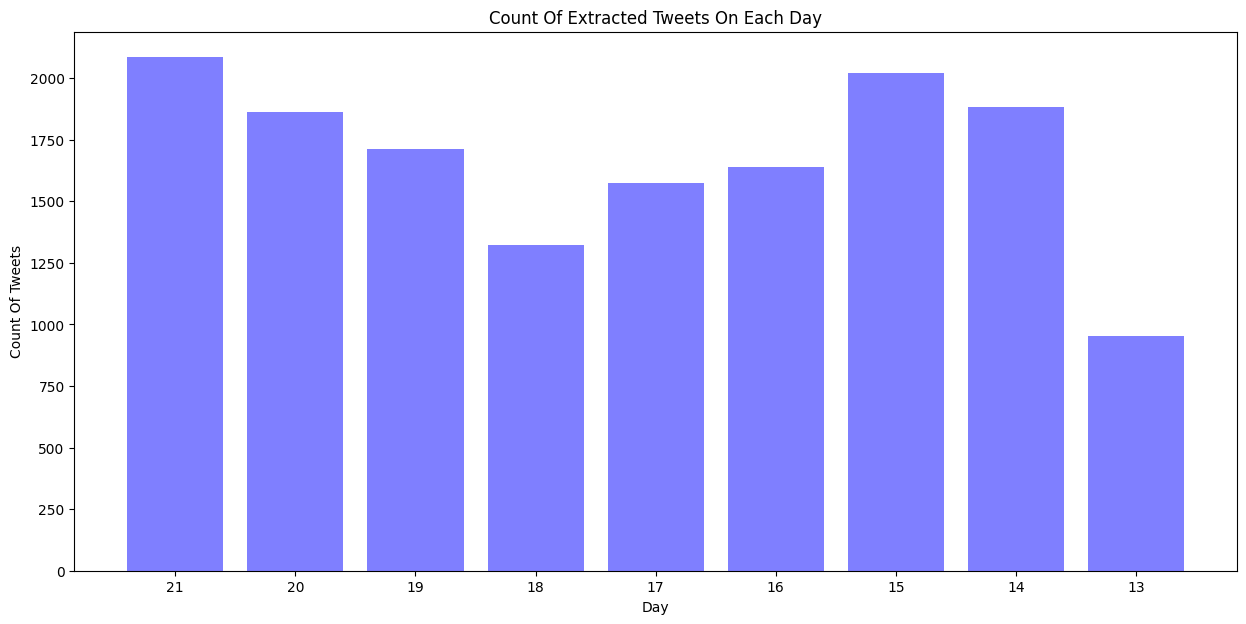

In [41]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'blue')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")


In [42]:
hours = df['Date'].dt.hour.tolist()

In [43]:
no_of_hours = Counter(hours)
no_of_hours

Counter({18: 1107,
         16: 953,
         17: 938,
         22: 917,
         21: 891,
         15: 867,
         23: 857,
         14: 834,
         20: 829,
         19: 828,
         1: 780,
         13: 740,
         0: 724,
         2: 628,
         12: 560,
         3: 475,
         11: 423,
         4: 397,
         5: 290,
         10: 260,
         6: 237,
         7: 198,
         8: 157,
         9: 156})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

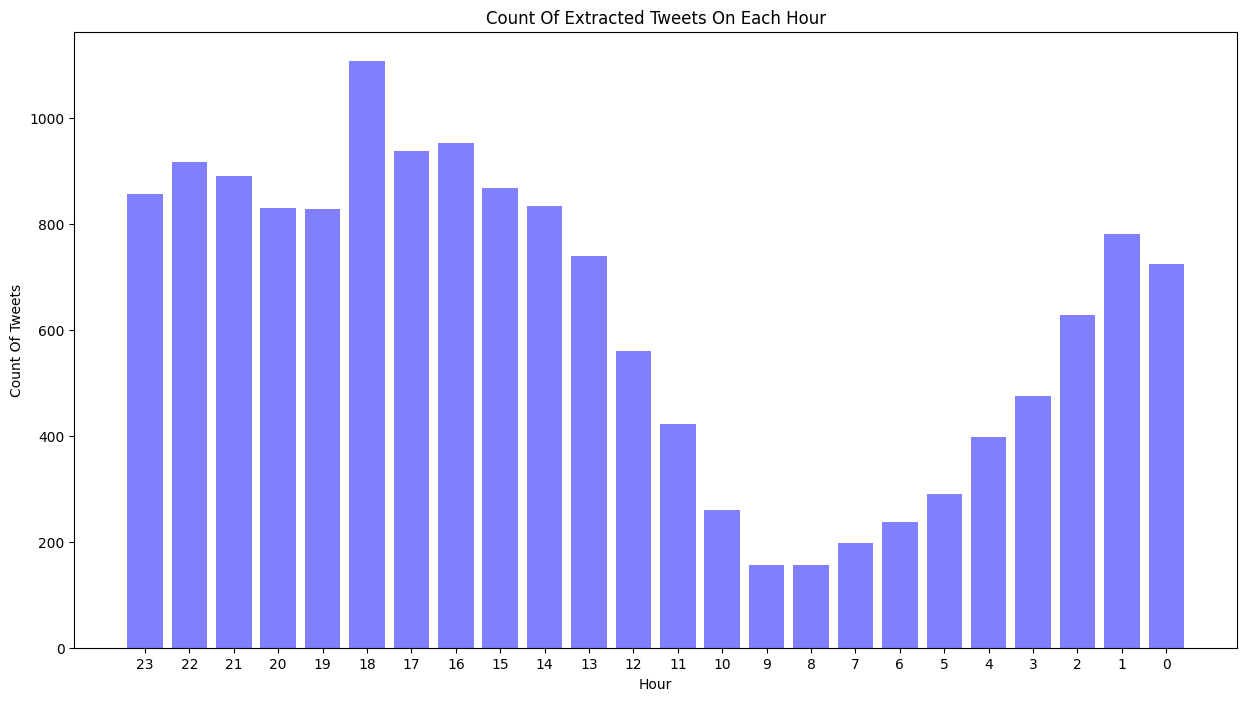

In [44]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'blue')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [45]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()


In [46]:
#removing stopwords
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)
df['Processed_Tweet'] = df["Processed_Tweet"].apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df["Processed_Tweet"]

['which', 'am', 'on', 'there', 'with', 'being', 'has', "wouldn't", 'above', 'he', 'm', 'them', 'what', 'myself', 'a', 'same', "couldn't", 'any', 'we', 'between', "mightn't", 'shan', "haven't", 'by', 'just', 'its', 'doing', 'wasn', 'who', 'but', 'then', 'few', 'his', 'as', 'y', 'was', 'nor', 'your', "don't", 'very', "aren't", 'didn', "didn't", 'their', 'isn', 'at', 'to', 'here', 'couldn', 'our', 'more', 'won', 'while', 'through', 'how', 'than', 'o', 'once', 'those', 'such', 'she', 'himself', 'herself', 'do', "isn't", 'until', 'theirs', 'this', 'off', 'having', 'is', 'for', 'from', 'hasn', 'weren', 'each', 'ourselves', 'and', 'itself', 'most', "it's", 'can', 'it', 'all', 'before', 'down', 'some', 'yourselves', 'because', 'not', "you'll", 'after', 'of', 't', 'shouldn', 'doesn', 'me', "needn't", 'over', 'd', 'further', 'if', 'or', 'up', 'have', 'you', 'again', 'needn', 'whom', 'that', 'why', 'ma', 'i', 'no', 'ours', 'hers', "wasn't", 'below', 'll', 'did', 'should', 'own', "shouldn't", 'oth

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/3595918028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = df["Processed_Tweet"].apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords


0        vp biden wish debate trump unless he: debate t...
1        georgewill , sad wake everyday forgetting geor...
2        question:if doesnt pick woman color, would bla...
3        right? biden formally implicated ukraine scand...
4        idiots let trump anything wants. biden gets el...
                               ...                        
15041    going big eulogizing stromthurmond (how look r...
15042    want leave left! show support election2020 hea...
15043    chatter biden maybe activating resources fight...
15044    fake polls? biden's 'nationwide lead' trump sa...
15045                  joe biden trump police armed teeth.
Name: Processed_Tweet, Length: 15046, dtype: object

tokenizing

In [47]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/663243142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))


0        [vp, biden, wish, debate, trump, unless, he, :...
1        [georgewill, ,, sad, wake, everyday, forgettin...
2        [question, :, if, doesnt, pick, woman, color, ...
3        [right, ?, biden, formally, implicated, ukrain...
4        [idiots, let, trump, anything, wants, ., biden...
                               ...                        
15041    [going, big, eulogizing, stromthurmond, (, how...
15042    [want, leave, left, !, show, support, election...
15043    [chatter, biden, maybe, activating, resources,...
15044    [fake, polls, ?, biden's, ', nationwide, lead,...
15045         [joe, biden, trump, police, armed, teeth, .]
Name: Processed_Tweet, Length: 15046, dtype: object

In [48]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)

In [49]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/3241840926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming


0        [vp, biden, wish, debat, trump, unless, he, :,...
1        [georgewil, ,, sad, wake, everyday, forget, ge...
2        [question, :, if, doesnt, pick, woman, color, ...
3        [right, ?, biden, formal, implic, ukrain, scan...
4        [idiot, let, trump, anyth, want, ., biden, get...
                               ...                        
15041    [go, big, eulog, stromthurmond, (, how, look, ...
15042    [want, leav, left, !, show, support, elect, 20...
15043    [chatter, biden, mayb, activ, resourc, fight, ...
15044    [fake, poll, ?, biden', ', nationwid, lead, ',...
15045            [joe, biden, trump, polic, arm, teeth, .]
Name: Processed_Tweet, Length: 15046, dtype: object

In [50]:
df["Processed_Tweet"] = df["Processed_Tweet"].apply(lambda x: [i for i in x if len(i)>2])
df["Processed_Tweet"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/398027368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Processed_Tweet"] = df["Processed_Tweet"].apply(lambda x: [i for i in x if len(i)>2])


0        [biden, wish, debat, trump, unless, debat, tru...
1        [georgewil, sad, wake, everyday, forget, georg...
2        [question, doesnt, pick, woman, color, would, ...
3        [right, biden, formal, implic, ukrain, scandal...
4        [idiot, let, trump, anyth, want, biden, get, e...
                               ...                        
15041    [big, eulog, stromthurmond, how, look, right, ...
15042    [want, leav, left, show, support, elect, 2020,...
15043    [chatter, biden, mayb, activ, resourc, fight, ...
15044    [fake, poll, biden', nationwid, lead, trump, s...
15045               [joe, biden, trump, polic, arm, teeth]
Name: Processed_Tweet, Length: 15046, dtype: object

In [51]:
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-07-21 23:59:43,1285726179907993601,False,@JoeBiden VP Biden I wish you wouldn't debate ...,BballmomEjZay,United States,Twitter for Android,0,54,192,0,"[biden, wish, debat, trump, unless, debat, tru..."
1,2020-07-21 23:59:27,1285726110513344520,False,"#GeorgeWill , it’s so sad you wake up everyday...",TalbotMac,"East Aurora, NY",Twitter for iPhone,0,882,1554,0,"[georgewil, sad, wake, everyday, forget, georg..."
2,2020-07-21 23:59:24,1285726099239055361,False,Question:\nIf @JoeBiden doesn’t pick a woman o...,bk_middleclass,"Nashville, TN",Twitter for iPhone,0,1294,1213,0,"[question, doesnt, pick, woman, color, would, ..."
3,2020-07-21 23:58:47,1285725945849151490,False,Right? 🤣🤣🤣 #Biden formally implicated in #Ukra...,MMorganBlair,United States,Twitter for iPhone,1,2476,3334,1,"[right, biden, formal, implic, ukrain, scandal..."
4,2020-07-21 23:58:02,1285725754961965056,False,These idiots let Trump do anything he wants. W...,realfacade1,Purgatory,Twitter for Android,0,2764,3799,0,"[idiot, let, trump, anyth, want, biden, get, e..."
...,...,...,...,...,...,...,...,...,...,...,...,...
15041,2020-07-13 10:57:58,1282630342038499329,False,Other than going big by eulogizing #StromThurm...,robertson_alton,"Fort Worth, or thereabouts.",Twitter Web App,0,1004,4999,0,"[big, eulog, stromthurmond, how, look, right, ..."
15042,2020-07-13 10:56:26,1282629958205145091,False,Don't want to leave out the left! Show your su...,GraphicMedia4,NaN,Twitter Web App,0,1,0,0,"[want, leav, left, show, support, elect, 2020,..."
15043,2020-07-13 10:53:50,1282629302199164928,False,Some chatter about #Biden maybe activating res...,copiousjawnt,"Lehigh Valley, PA",Twitter for Android,0,84,210,0,"[chatter, biden, mayb, activ, resourc, fight, ..."
15044,2020-07-13 10:53:46,1282629284524433409,False,Fake #Polls? Why #Biden's 'Nationwide Lead' Ov...,blinova14,NaN,Twitter Web App,4,836,432,0,"[fake, poll, biden', nationwid, lead, trump, s..."


Modifying tweets as per model input format

In [52]:
texts = df["Processed_Tweet"].apply(lambda x: [i for i in x] )
texts

0        [biden, wish, debat, trump, unless, debat, tru...
1        [georgewil, sad, wake, everyday, forget, georg...
2        [question, doesnt, pick, woman, color, would, ...
3        [right, biden, formal, implic, ukrain, scandal...
4        [idiot, let, trump, anyth, want, biden, get, e...
                               ...                        
15041    [big, eulog, stromthurmond, how, look, right, ...
15042    [want, leav, left, show, support, elect, 2020,...
15043    [chatter, biden, mayb, activ, resourc, fight, ...
15044    [fake, poll, biden', nationwid, lead, trump, s...
15045               [joe, biden, trump, polic, arm, teeth]
Name: Processed_Tweet, Length: 15046, dtype: object

In [53]:
all_words = []
for i in texts:
    all_words.append(" ".join(i))
all_words

['biden wish debat trump unless debat trump show taxesdeb tell putin stop kill soldiersdeb put sanction putin elect hack wish publicli challeng thi biden rice',
 'georgewil sad wake everyday forget georg will elitist like swer badli need disinfect your new breed senileelit man plan vote biden',
 'question doesnt pick woman color would black commun hold him resist biden bidenrepublican',
 'right biden formal implic ukrain scandal report afternoon burisma',
 'idiot let trump anyth want biden get elect want hear word hope biden barack come like',
 'could biden ohio pennsylvania dont buy it.anyon electiontwitt buy',
 'never teach religion public school went want watch biden pander islamdisgusting.peopl dumb christian country.peopl believ god outnumb non christian religion combin usabiden',
 'dream vote biden biden 2020 sweep hous senat presid biden novemb',
 "joy one woman mission expos none good fit potu i'm happi put space time thi biden blacklivesmatt biden 2020landslid",
 'slept better

In [54]:
text = []
for i in texts:
    for j in i:
        text.append(j)
text

['biden',
 'wish',
 'debat',
 'trump',
 'unless',
 'debat',
 'trump',
 'show',
 'taxesdeb',
 'tell',
 'putin',
 'stop',
 'kill',
 'soldiersdeb',
 'put',
 'sanction',
 'putin',
 'elect',
 'hack',
 'wish',
 'publicli',
 'challeng',
 'thi',
 'biden',
 'rice',
 'georgewil',
 'sad',
 'wake',
 'everyday',
 'forget',
 'georg',
 'will',
 'elitist',
 'like',
 'swer',
 'badli',
 'need',
 'disinfect',
 'your',
 'new',
 'breed',
 'senileelit',
 'man',
 'plan',
 'vote',
 'biden',
 'question',
 'doesnt',
 'pick',
 'woman',
 'color',
 'would',
 'black',
 'commun',
 'hold',
 'him',
 'resist',
 'biden',
 'bidenrepublican',
 'right',
 'biden',
 'formal',
 'implic',
 'ukrain',
 'scandal',
 'report',
 'afternoon',
 'burisma',
 'idiot',
 'let',
 'trump',
 'anyth',
 'want',
 'biden',
 'get',
 'elect',
 'want',
 'hear',
 'word',
 'hope',
 'biden',
 'barack',
 'come',
 'like',
 'could',
 'biden',
 'ohio',
 'pennsylvania',
 'dont',
 'buy',
 'it.anyon',
 'electiontwitt',
 'buy',
 'never',
 'teach',
 'religion',

In [55]:
len(text)

238202

In [56]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

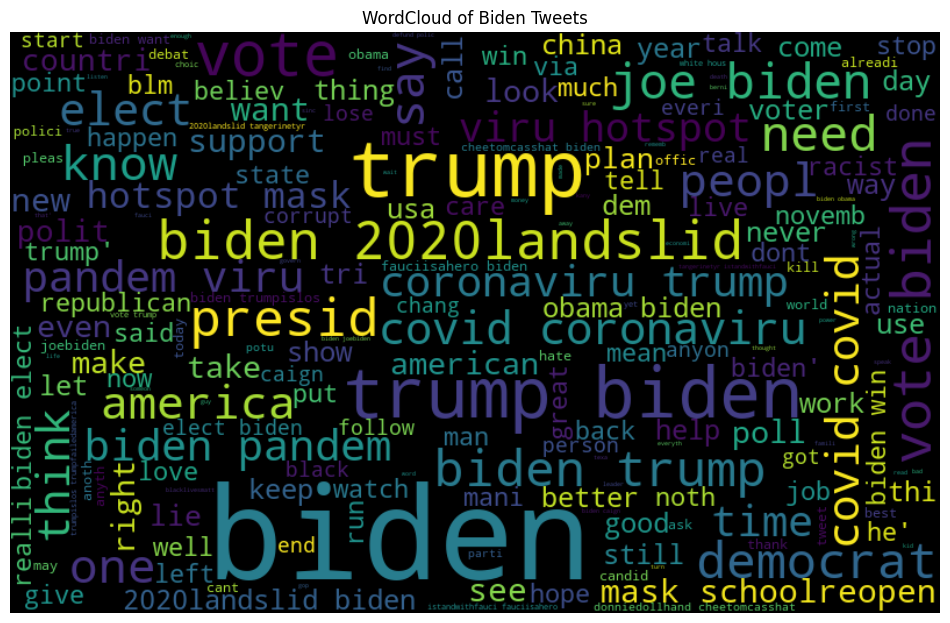

In [57]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Biden Tweets")
plt.show()

# SENTIMENT ANALYSIS

In [58]:
from textblob import TextBlob

In [59]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)

In [60]:
len(pol)

15046

In [61]:
len(text)

238202

In [62]:
df['Processed_Tweet']

0        [biden, wish, debat, trump, unless, debat, tru...
1        [georgewil, sad, wake, everyday, forget, georg...
2        [question, doesnt, pick, woman, color, would, ...
3        [right, biden, formal, implic, ukrain, scandal...
4        [idiot, let, trump, anyth, want, biden, get, e...
                               ...                        
15041    [big, eulog, stromthurmond, how, look, right, ...
15042    [want, leav, left, show, support, elect, 2020,...
15043    [chatter, biden, mayb, activ, resourc, fight, ...
15044    [fake, poll, biden', nationwid, lead, trump, s...
15045               [joe, biden, trump, polic, arm, teeth]
Name: Processed_Tweet, Length: 15046, dtype: object

In [63]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 5880
Negative Tweets: 3035
Neutral Tweets 6131


In [64]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/saikeerthanpalavarapu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

In [66]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))

In [67]:
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.207,0.631,0.162,-0.3612
1,0.196,0.706,0.098,-0.3612
2,0.000,1.000,0.000,0.0000
3,0.266,0.734,0.000,-0.4404
4,0.148,0.493,0.359,0.4019
...,...,...,...,...
15041,0.167,0.833,0.000,-0.6808
15042,0.000,0.833,0.167,0.4588
15043,0.206,0.794,0.000,-0.6369
15044,0.116,0.637,0.247,0.5423


In [68]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.207,0.631,0.162,-0.3612,Negative
1,0.196,0.706,0.098,-0.3612,Negative
2,0.000,1.000,0.000,0.0000,Neutral
3,0.266,0.734,0.000,-0.4404,Negative
4,0.148,0.493,0.359,0.4019,Positive


<Axes: xlabel='sentiment', ylabel='count'>

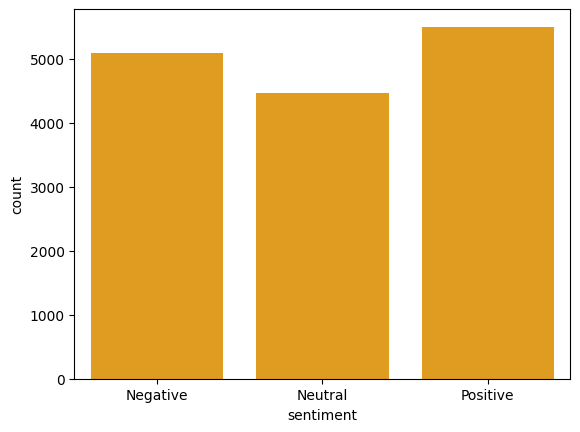

In [69]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count , color = 'orange')

In [70]:
filepath = r"./NRC Emotion Lexicon.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

86343

In [71]:
emolex_df

,word,emotion,association
0,abandonment,joy,0.0
1,abandonment,negative,1.0
2,abandonment,positive,0.0
3,abandonment,sadness,1.0
4,abandonment,surprise,1.0
...,...,...,...
86338,oncologist,disgust,0.0
86339,oncologist,fear,0.0
86340,oncologist,joy,0.0
86341,oncologist,negative,0.0


In [72]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [73]:
word_emotion=dict()
for i in range(0,86343):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association  

In [74]:
for i in range(0,15046):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]
emotions

{'positive': 5752.0,
 'negative': 5936.0,
 'surprise': 1491.0,
 'sadness': 2759.0,
 'anger': 3044.0,
 'joy': 1994.0,
 'trust': 3538.0,
 'fear': 3265.0,
 'anticipation': 2296.0,
 'disgust': 1944.0}

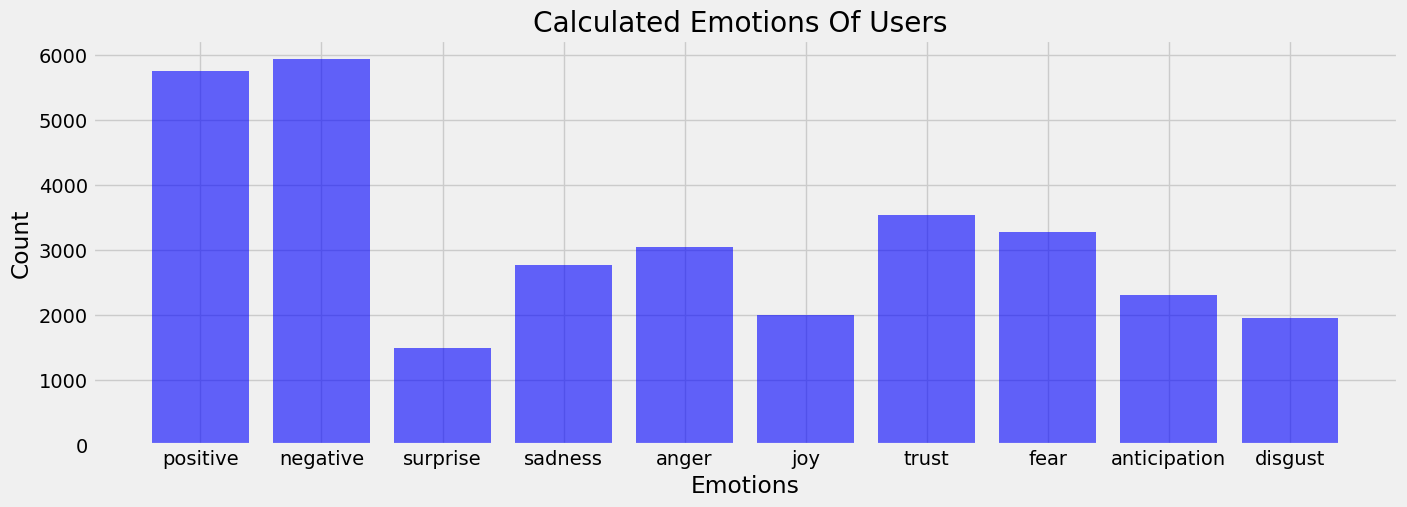

In [75]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='blue',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [76]:
df["Location"]  = df["Location"].fillna('USA')
df["Location"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/770225664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Location"]  = df["Location"].fillna('USA')


0                       United States
1                     East Aurora, NY
2                       Nashville, TN
3                       United States
4                          Purgatory 
                     ...             
15041    Fort Worth, or thereabouts. 
15042                             USA
15043               Lehigh Valley, PA
15044                             USA
15045                   Brookline, MA
Name: Location, Length: 15046, dtype: object

In [77]:
df["Location"] =  df["Location"].apply(lambda x: x.replace('United States','USA'))
df["Location"]

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/1588729944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Location"] =  df["Location"].apply(lambda x: x.replace('United States','USA'))


0                                 USA
1                     East Aurora, NY
2                       Nashville, TN
3                                 USA
4                          Purgatory 
                     ...             
15041    Fort Worth, or thereabouts. 
15042                             USA
15043               Lehigh Valley, PA
15044                             USA
15045                   Brookline, MA
Name: Location, Length: 15046, dtype: object

In [78]:
 df["Location"].value_counts()

Location
USA                        5487
First star to the right     174
Florida, USA                158
Washington, DC              157
Earth                       136
                           ... 
My office...                  1
Behind a log, NC              1
Orange Co.                    1
Gadigal land                  1
NEVADA                        1
Name: count, Length: 3195, dtype: int64

In [79]:
locations_s = []
locations_s =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_s
df

/var/folders/d0/d8qgs1qn1x5dwdq_9zy4q3rm0000gn/T/ipykernel_8370/180803770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Location'] = locations_s


,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-07-21 23:59:43,1285726179907993601,False,@JoeBiden VP Biden I wish you wouldn't debate ...,BballmomEjZay,USA,Twitter for Android,0,54,192,0,"[biden, wish, debat, trump, unless, debat, tru...",USA
1,2020-07-21 23:59:27,1285726110513344520,False,"#GeorgeWill , it’s so sad you wake up everyday...",TalbotMac,"East Aurora, NY",Twitter for iPhone,0,882,1554,0,"[georgewil, sad, wake, everyday, forget, georg...",East Aurora
2,2020-07-21 23:59:24,1285726099239055361,False,Question:\nIf @JoeBiden doesn’t pick a woman o...,bk_middleclass,"Nashville, TN",Twitter for iPhone,0,1294,1213,0,"[question, doesnt, pick, woman, color, would, ...",Nashville
3,2020-07-21 23:58:47,1285725945849151490,False,Right? 🤣🤣🤣 #Biden formally implicated in #Ukra...,MMorganBlair,USA,Twitter for iPhone,1,2476,3334,1,"[right, biden, formal, implic, ukrain, scandal...",USA
4,2020-07-21 23:58:02,1285725754961965056,False,These idiots let Trump do anything he wants. W...,realfacade1,Purgatory,Twitter for Android,0,2764,3799,0,"[idiot, let, trump, anyth, want, biden, get, e...",Purgatory
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15041,2020-07-13 10:57:58,1282630342038499329,False,Other than going big by eulogizing #StromThurm...,robertson_alton,"Fort Worth, or thereabouts.",Twitter Web App,0,1004,4999,0,"[big, eulog, stromthurmond, how, look, right, ...",Fort Worth
15042,2020-07-13 10:56:26,1282629958205145091,False,Don't want to leave out the left! Show your su...,GraphicMedia4,USA,Twitter Web App,0,1,0,0,"[want, leav, left, show, support, elect, 2020,...",USA
15043,2020-07-13 10:53:50,1282629302199164928,False,Some chatter about #Biden maybe activating res...,copiousjawnt,"Lehigh Valley, PA",Twitter for Android,0,84,210,0,"[chatter, biden, mayb, activ, resourc, fight, ...",Lehigh Valley
15044,2020-07-13 10:53:46,1282629284524433409,False,Fake #Polls? Why #Biden's 'Nationwide Lead' Ov...,blinova14,USA,Twitter Web App,4,836,432,0,"[fake, poll, biden', nationwid, lead, trump, s...",USA


In [80]:
df_dup = df.copy()

In [81]:
df_dup['sentiment'] = sentimental_score_df['val']
df_dup.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment
0,2020-07-21 23:59:43,1285726179907993601,False,@JoeBiden VP Biden I wish you wouldn't debate ...,BballmomEjZay,USA,Twitter for Android,0,54,192,0,"[biden, wish, debat, trump, unless, debat, tru...",USA,Negative
1,2020-07-21 23:59:27,1285726110513344520,False,"#GeorgeWill , it’s so sad you wake up everyday...",TalbotMac,"East Aurora, NY",Twitter for iPhone,0,882,1554,0,"[georgewil, sad, wake, everyday, forget, georg...",East Aurora,Negative
2,2020-07-21 23:59:24,1285726099239055361,False,Question:\nIf @JoeBiden doesn’t pick a woman o...,bk_middleclass,"Nashville, TN",Twitter for iPhone,0,1294,1213,0,"[question, doesnt, pick, woman, color, would, ...",Nashville,Neutral
3,2020-07-21 23:58:47,1285725945849151490,False,Right? 🤣🤣🤣 #Biden formally implicated in #Ukra...,MMorganBlair,USA,Twitter for iPhone,1,2476,3334,1,"[right, biden, formal, implic, ukrain, scandal...",USA,Negative
4,2020-07-21 23:58:02,1285725754961965056,False,These idiots let Trump do anything he wants. W...,realfacade1,Purgatory,Twitter for Android,0,2764,3799,0,"[idiot, let, trump, anyth, want, biden, get, e...",Purgatory,Positive


In [82]:
df_dup.to_csv('./sentiment_before_Election.csv',index = False)

In [83]:
df_dup['day'] = df_dup.Date.dt.day
df_dup.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-07-21 23:59:43,1285726179907993601,False,@JoeBiden VP Biden I wish you wouldn't debate ...,BballmomEjZay,USA,Twitter for Android,0,54,192,0,"[biden, wish, debat, trump, unless, debat, tru...",USA,Negative,21
1,2020-07-21 23:59:27,1285726110513344520,False,"#GeorgeWill , it’s so sad you wake up everyday...",TalbotMac,"East Aurora, NY",Twitter for iPhone,0,882,1554,0,"[georgewil, sad, wake, everyday, forget, georg...",East Aurora,Negative,21
2,2020-07-21 23:59:24,1285726099239055361,False,Question:\nIf @JoeBiden doesn’t pick a woman o...,bk_middleclass,"Nashville, TN",Twitter for iPhone,0,1294,1213,0,"[question, doesnt, pick, woman, color, would, ...",Nashville,Neutral,21
3,2020-07-21 23:58:47,1285725945849151490,False,Right? 🤣🤣🤣 #Biden formally implicated in #Ukra...,MMorganBlair,USA,Twitter for iPhone,1,2476,3334,1,"[right, biden, formal, implic, ukrain, scandal...",USA,Negative,21
4,2020-07-21 23:58:02,1285725754961965056,False,These idiots let Trump do anything he wants. W...,realfacade1,Purgatory,Twitter for Android,0,2764,3799,0,"[idiot, let, trump, anyth, want, biden, get, e...",Purgatory,Positive,21


<Axes: xlabel='day', ylabel='count'>

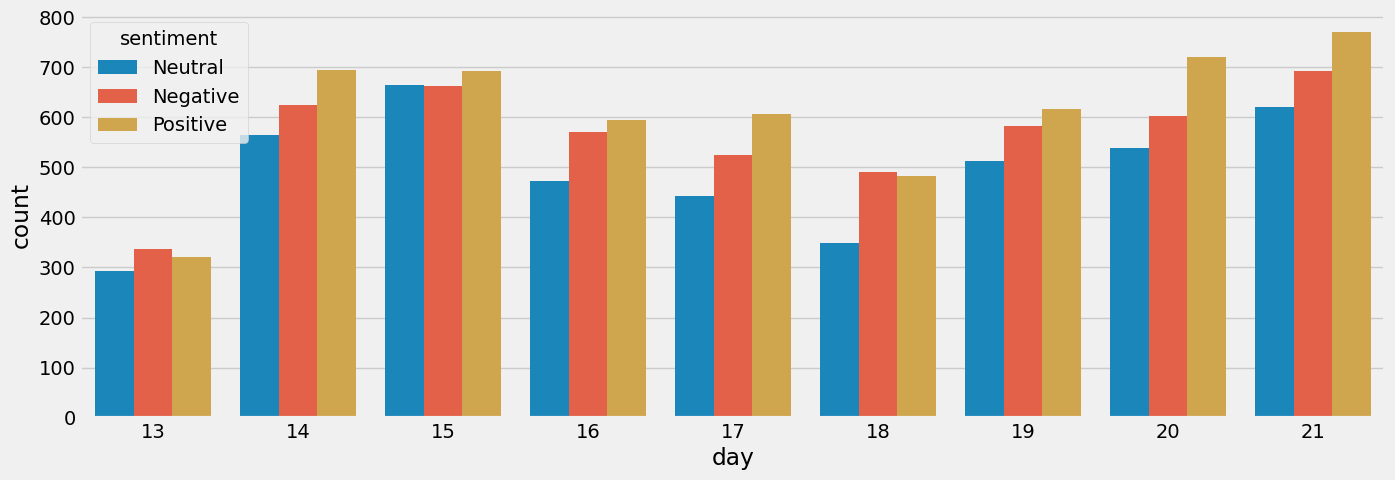

In [84]:
sns.countplot(x='day', hue='sentiment', data=df_dup)

Predictions

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [86]:
le = LabelEncoder() 
  
df_dup['sentiment_1']= le.fit_transform(df_dup['sentiment']) 
df_dup

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-07-21 23:59:43,1285726179907993601,False,@JoeBiden VP Biden I wish you wouldn't debate ...,BballmomEjZay,USA,Twitter for Android,0,54,192,0,"[biden, wish, debat, trump, unless, debat, tru...",USA,Negative,21,0
1,2020-07-21 23:59:27,1285726110513344520,False,"#GeorgeWill , it’s so sad you wake up everyday...",TalbotMac,"East Aurora, NY",Twitter for iPhone,0,882,1554,0,"[georgewil, sad, wake, everyday, forget, georg...",East Aurora,Negative,21,0
2,2020-07-21 23:59:24,1285726099239055361,False,Question:\nIf @JoeBiden doesn’t pick a woman o...,bk_middleclass,"Nashville, TN",Twitter for iPhone,0,1294,1213,0,"[question, doesnt, pick, woman, color, would, ...",Nashville,Neutral,21,1
3,2020-07-21 23:58:47,1285725945849151490,False,Right? 🤣🤣🤣 #Biden formally implicated in #Ukra...,MMorganBlair,USA,Twitter for iPhone,1,2476,3334,1,"[right, biden, formal, implic, ukrain, scandal...",USA,Negative,21,0
4,2020-07-21 23:58:02,1285725754961965056,False,These idiots let Trump do anything he wants. W...,realfacade1,Purgatory,Twitter for Android,0,2764,3799,0,"[idiot, let, trump, anyth, want, biden, get, e...",Purgatory,Positive,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15041,2020-07-13 10:57:58,1282630342038499329,False,Other than going big by eulogizing #StromThurm...,robertson_alton,"Fort Worth, or thereabouts.",Twitter Web App,0,1004,4999,0,"[big, eulog, stromthurmond, how, look, right, ...",Fort Worth,Negative,13,0
15042,2020-07-13 10:56:26,1282629958205145091,False,Don't want to leave out the left! Show your su...,GraphicMedia4,USA,Twitter Web App,0,1,0,0,"[want, leav, left, show, support, elect, 2020,...",USA,Positive,13,2
15043,2020-07-13 10:53:50,1282629302199164928,False,Some chatter about #Biden maybe activating res...,copiousjawnt,"Lehigh Valley, PA",Twitter for Android,0,84,210,0,"[chatter, biden, mayb, activ, resourc, fight, ...",Lehigh Valley,Negative,13,0
15044,2020-07-13 10:53:46,1282629284524433409,False,Fake #Polls? Why #Biden's 'Nationwide Lead' Ov...,blinova14,USA,Twitter Web App,4,836,432,0,"[fake, poll, biden', nationwid, lead, trump, s...",USA,Positive,13,2


In [87]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df_dup['sentiment_1']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


DECISION TREE

In [89]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [90]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.8019494904740806
Precision Score:  0.8019494904740806
Recall Score:  0.8019494904740806
F1 Score:  0.8019494904740806


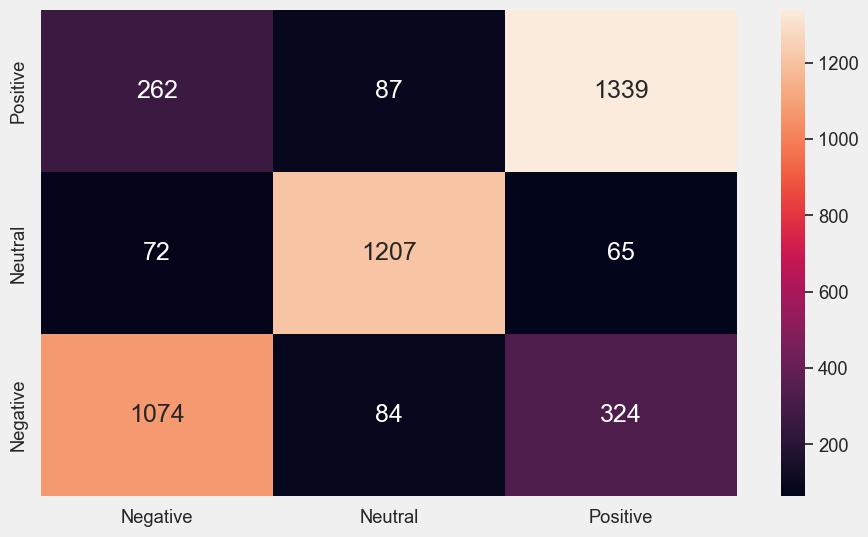

In [91]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

RANDOM FOREST CLASSIFIER

In [92]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [93]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.8478068232166592
Precision Score:  0.8478068232166592
Recall Score:  0.8478068232166592
F1 Score:  0.8478068232166592


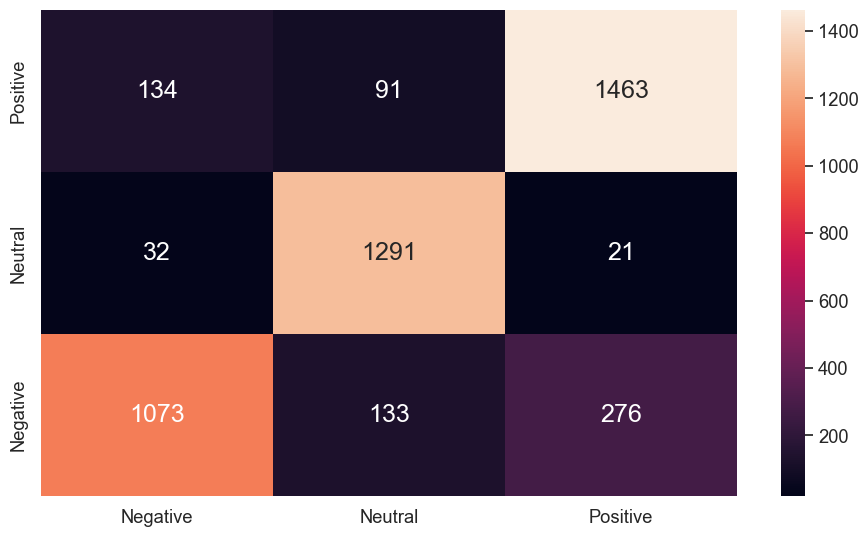

In [94]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

NAIVE BAYES CLASSIFIER

In [95]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

In [96]:
accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.7323881258307487
Precision Score:  0.7323881258307487
Recall Score:  0.7323881258307487
F1 Score:  0.7323881258307487


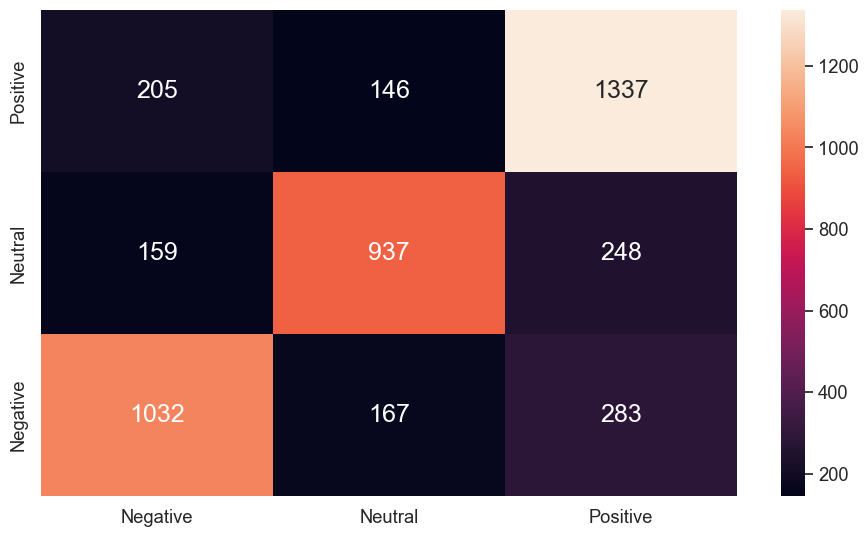

In [97]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

LOGISTIC REGRESSION

In [100]:
classifier_LR = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'auto', penalty = None)
classifier_LR.fit(X_train, y_train)
y_pred_LR = classifier_LR.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
accuracy_score_LR = accuracy_score(y_test, y_pred_LR)
precision_score_LR = precision_score(y_test, y_pred_LR , average = 'micro')
recall_score_LR = recall_score(y_test, y_pred_LR, average = 'micro')
f1_score_LR = f1_score(y_test, y_pred_LR, average = 'micro')
print("Accuracy Score: " , accuracy_score_LR)
print("Precision Score: " , precision_score_LR)
print("Recall Score: " , recall_score_LR)
print("F1 Score: " , f1_score_LR)

Accuracy Score:  0.8077093486929553
Precision Score:  0.8077093486929553
Recall Score:  0.8077093486929553
F1 Score:  0.8077093486929553


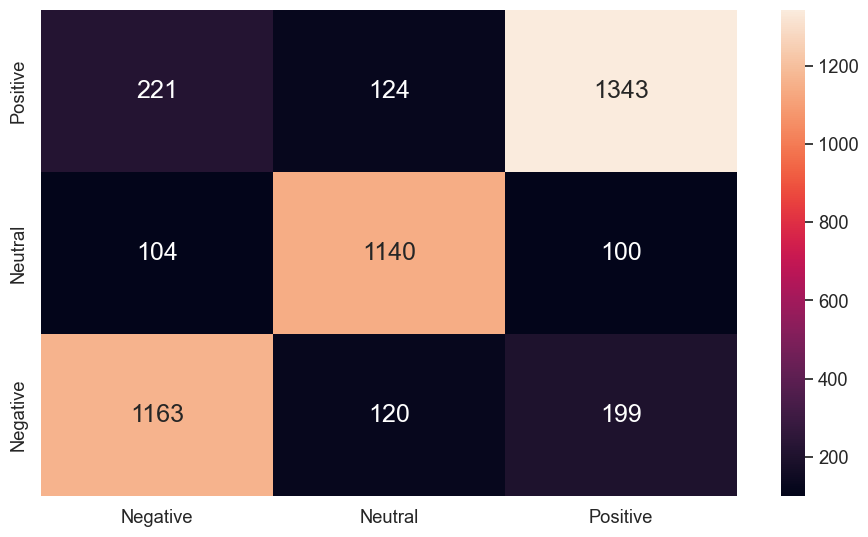

In [102]:
cm_LR = confusion_matrix(y_test, y_pred_LR)

df_cm_LR = pd.DataFrame(cm_LR, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_LR, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

# Comparing the Models

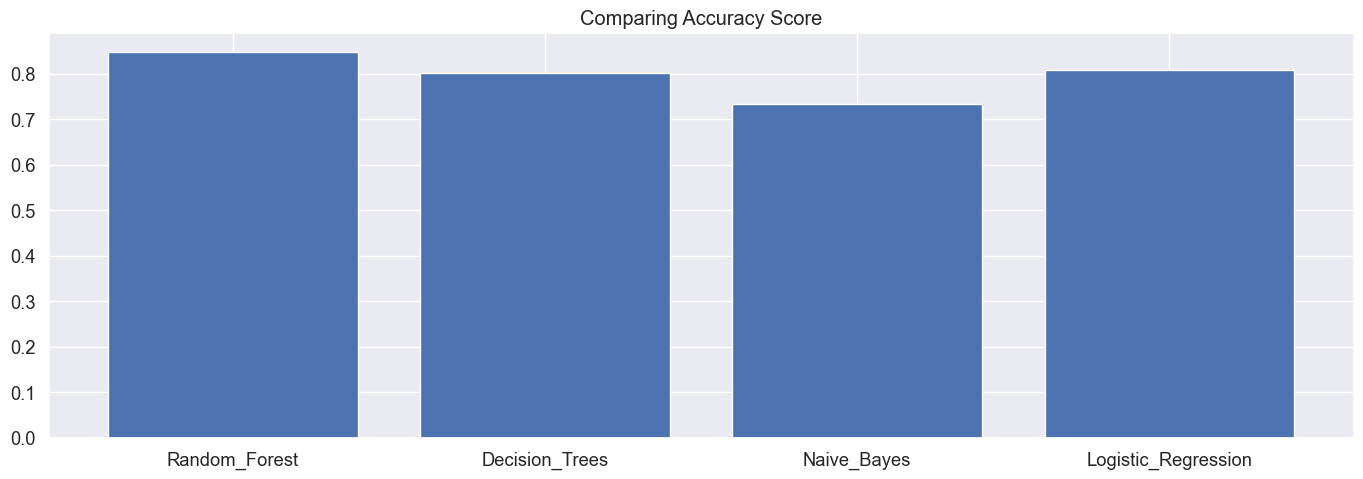

In [103]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_NB, accuracy_score_LR]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes', "Logistic_Regression"]
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

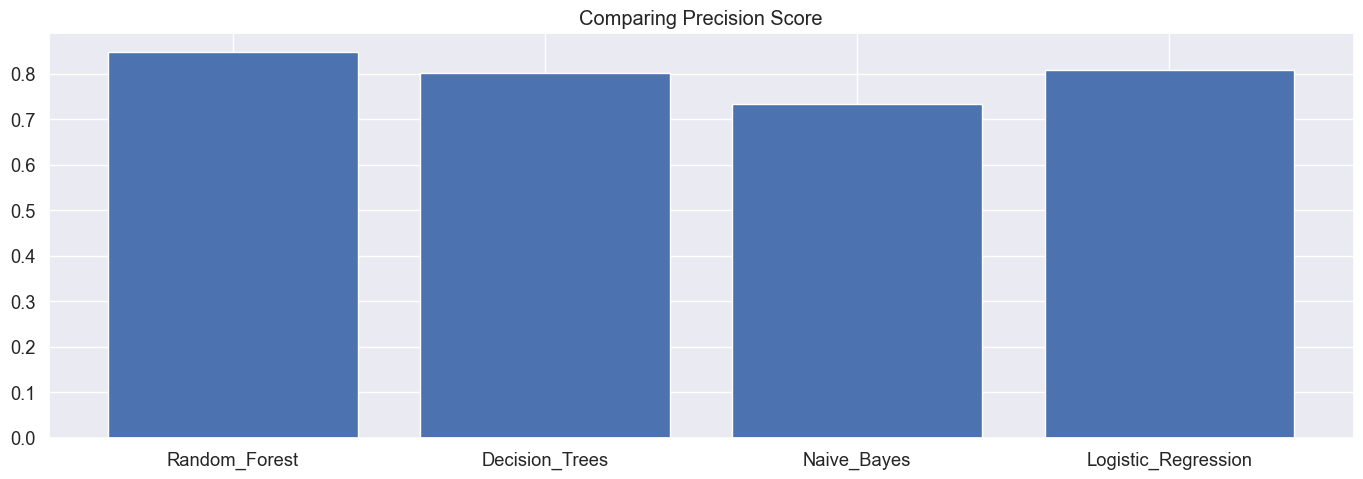

In [104]:
Precision = [precision_score_RF, precision_score_DT, precision_score_NB, precision_score_LR]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes', 'Logistic_Regression']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

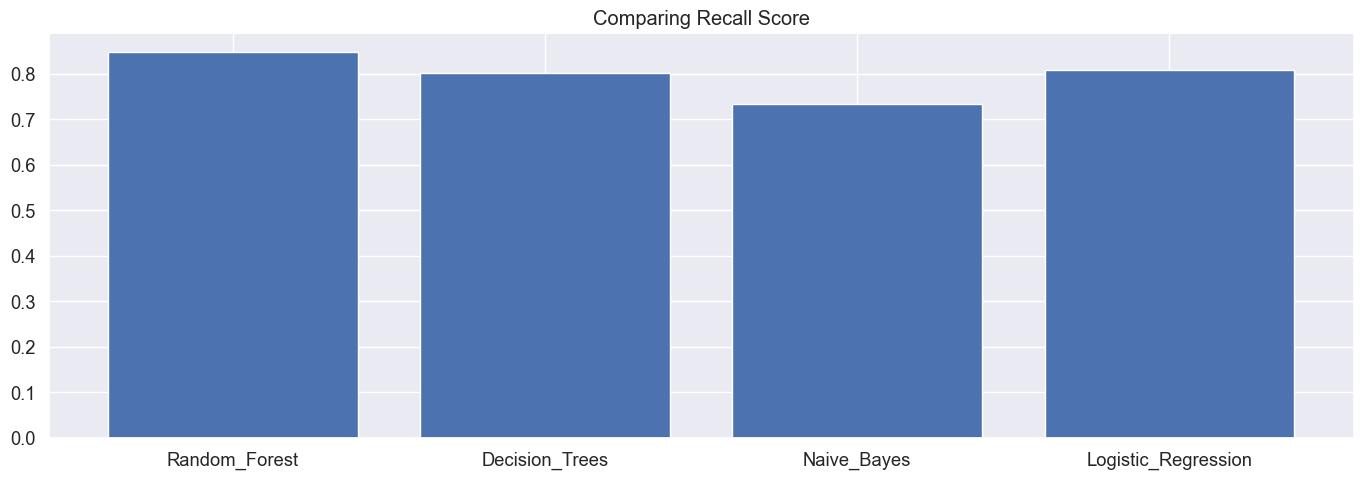

In [105]:
Recall = [recall_score_RF, recall_score_DT, recall_score_NB, recall_score_LR]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes', 'Logistic_Regression']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

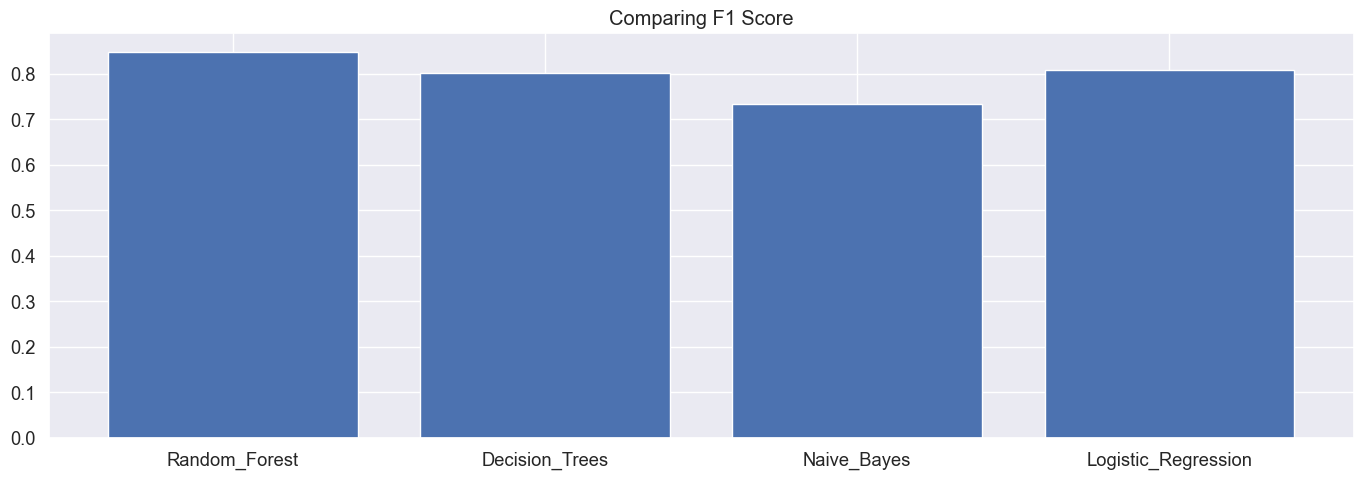

In [106]:
F1 = [f1_score_RF,f1_score_DT,f1_score_NB, f1_score_LR]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes', 'Logistic_Regression']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()